In [21]:
import pandas as pd

In [22]:
arquivo = "bases_de_dados/Base de Dados_Doação e Transplantes_2015-2023.xlsx"

In [23]:
# Reading spread-sheet

header_row = 4

df_inscricao = pd.read_excel(
    arquivo,
    sheet_name=0,
    header=header_row,
)

# Seleciona pacientes de rim
df_inscricao = df_inscricao[df_inscricao.Enxerto == "RI"]
n_amostras = len(df_inscricao)

df_inscricao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105620 entries, 2 to 325666
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   UF                      105620 non-null  object        
 1   Região                  105620 non-null  object        
 2   ID                      105620 non-null  object        
 3   Ano                     105620 non-null  int64         
 4   Mês                     105620 non-null  object        
 5   Data da Inscrição       105620 non-null  datetime64[ns]
 6   Enxerto                 105620 non-null  object        
 7   Data de Nascimento      105620 non-null  datetime64[ns]
 8   Sexo                    105620 non-null  object        
 9   Grupo Sanguíneo         105620 non-null  object        
 10  Cor                     105620 non-null  object        
 11  UF origem               105620 non-null  object        
 12  Equipe                  105620

In [24]:
# Reading spread-sheet

header_row = 5

df_obitos = pd.read_excel(
    arquivo,
    sheet_name=4,
    header=header_row,
)

# Seleciona pacientes de rim
df_obitos = df_obitos[df_obitos.Enxerto == "RI"]
df_obitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12421 entries, 0 to 20223
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UF                      12421 non-null  object        
 1   Região                  12421 non-null  object        
 2   ID                      12421 non-null  object        
 3   Data de Nascimento      12421 non-null  int64         
 4   Sexo                    12421 non-null  object        
 5   Grupo Sanguíneo         12421 non-null  object        
 6   Cor                     12421 non-null  object        
 7   Ano                     12421 non-null  int64         
 8   Mês                     12421 non-null  object        
 9   Data do Óbito           12421 non-null  datetime64[ns]
 10  Enxerto                 12421 non-null  object        
 11  Equipe                  12421 non-null  object        
 12   Estabelecimento        12421 non-null  object

In [25]:
header_row = 4

df_tranplantes = pd.read_excel(
    arquivo,
    sheet_name=2,
    header=header_row,
)

# Seleciona pacientes de rim
df_tranplantes = df_tranplantes[df_tranplantes.Enxerto == "RI"]
df_tranplantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46465 entries, 2 to 185770
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0    Ano do Transplante     46465 non-null  int64         
 1    Mês do Transplante     46465 non-null  object        
 2   Enxerto                 46465 non-null  object        
 3   UF                      46465 non-null  object        
 4   Região                  46465 non-null  object        
 5   Data da Inscrição       46465 non-null  datetime64[ns]
 6   Data do Transplante     46465 non-null  datetime64[ns]
 7   Tipo de Doador          46465 non-null  object        
 8   UF de Origem            46465 non-null  object        
 9   ID                      46465 non-null  object        
 10  Data de Nascimento      46465 non-null  datetime64[ns]
 11  Sexo                    46465 non-null  object        
 12  Grupo Sanguíneo         46465 non-null  objec

In [26]:
join_insc_obt = df_inscricao.set_index("ID").join(
    df_obitos.set_index("ID"), on=["ID"], lsuffix="_insc", rsuffix="_obt"
)
join_insc_obt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105620 entries, 124877PB to 313294SP
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   UF_insc                      105620 non-null  object        
 1   Região_insc                  105620 non-null  object        
 2   Ano_insc                     105620 non-null  int64         
 3   Mês_insc                     105620 non-null  object        
 4   Data da Inscrição            105620 non-null  datetime64[ns]
 5   Enxerto_insc                 105620 non-null  object        
 6   Data de Nascimento_insc      105620 non-null  datetime64[ns]
 7   Sexo_insc                    105620 non-null  object        
 8   Grupo Sanguíneo_insc         105620 non-null  object        
 9   Cor_insc                     105620 non-null  object        
 10  UF origem                    105620 non-null  object        
 11  Equipe_insc           

In [27]:
join_insc_obt_tx = join_insc_obt.join(
    df_tranplantes.set_index("ID"), on=["ID"], lsuffix="", rsuffix="_tx"
)
join_insc_obt_tx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105620 entries, 124877PB to 313294SP
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   UF_insc                      105620 non-null  object        
 1   Região_insc                  105620 non-null  object        
 2   Ano_insc                     105620 non-null  int64         
 3   Mês_insc                     105620 non-null  object        
 4   Data da Inscrição            105620 non-null  datetime64[ns]
 5   Enxerto_insc                 105620 non-null  object        
 6   Data de Nascimento_insc      105620 non-null  datetime64[ns]
 7   Sexo_insc                    105620 non-null  object        
 8   Grupo Sanguíneo_insc         105620 non-null  object        
 9   Cor_insc                     105620 non-null  object        
 10  UF origem                    105620 non-null  object        
 11  Equipe_insc           

In [28]:
join_insc_obt_tx.to_csv("bases_de_dados/join_original.csv")

In [29]:
# retirando colunas duplicadas

pertinent_df = join_insc_obt_tx[
    [
        "UF_insc",
        "Região_insc",
        "Data da Inscrição",
        "Data de Nascimento_insc",
        "Sexo_insc",
        "Grupo Sanguíneo_insc",
        "Cor_insc",
        "UF origem",
        "Data do Óbito",
        "Data do Transplante",
        "Tipo de Doador",
    ]
]

# renomeando colunas

pertinent_df = pertinent_df.rename(
    columns={
        "UF_insc": "uf",
        "Região_insc": "regiao",
        "Data da Inscrição": "data_da_inscricao",
        "Data de Nascimento_insc": "data_de_nascimento",
        "Sexo_insc": "sexo",
        "Grupo Sanguíneo_insc": "grupo_sanguineo",
        "Cor_insc": "cor",
        "UF origem": "uf_origem",
        "Data do Óbito": "data_do_obito",
        "Data do Transplante": "data_do_transplante",
        "Tipo de Doador": "tipo_de_doador",
    }
)

pertinent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105620 entries, 124877PB to 313294SP
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   uf                   105620 non-null  object        
 1   regiao               105620 non-null  object        
 2   data_da_inscricao    105620 non-null  datetime64[ns]
 3   data_de_nascimento   105620 non-null  datetime64[ns]
 4   sexo                 105620 non-null  object        
 5   grupo_sanguineo      105620 non-null  object        
 6   cor                  105620 non-null  object        
 7   uf_origem            105620 non-null  object        
 8   data_do_obito        9268 non-null    datetime64[ns]
 9   data_do_transplante  38332 non-null   datetime64[ns]
 10  tipo_de_doador       38332 non-null   object        
dtypes: datetime64[ns](4), object(7)
memory usage: 9.7+ MB


In [30]:
# retirando pacientes ainda em fila

treated_df = pertinent_df.dropna(
    subset=["data_do_obito", "data_do_transplante"], how="all"
)

treated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47599 entries, 124877PB to 328786MG
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uf                   47599 non-null  object        
 1   regiao               47599 non-null  object        
 2   data_da_inscricao    47599 non-null  datetime64[ns]
 3   data_de_nascimento   47599 non-null  datetime64[ns]
 4   sexo                 47599 non-null  object        
 5   grupo_sanguineo      47599 non-null  object        
 6   cor                  47599 non-null  object        
 7   uf_origem            47599 non-null  object        
 8   data_do_obito        9268 non-null   datetime64[ns]
 9   data_do_transplante  38332 non-null  datetime64[ns]
 10  tipo_de_doador       38332 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 4.4+ MB


In [31]:
treated_df.to_csv("bases_de_dados/tabela_filtrada.csv")

In [80]:
# tratanto NaN
treated_nan_df = treated_df.fillna(0)
treated_nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47599 entries, 124877PB to 328786MG
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uf                   47599 non-null  object        
 1   regiao               47599 non-null  object        
 2   data_da_inscricao    47599 non-null  datetime64[ns]
 3   data_de_nascimento   47599 non-null  datetime64[ns]
 4   sexo                 47599 non-null  object        
 5   grupo_sanguineo      47599 non-null  object        
 6   cor                  47599 non-null  object        
 7   uf_origem            47599 non-null  object        
 8   data_do_obito        47599 non-null  object        
 9   data_do_transplante  47599 non-null  object        
 10  tipo_de_doador       47599 non-null  object        
dtypes: datetime64[ns](2), object(9)
memory usage: 5.4+ MB


In [81]:
treated_nan_df.to_csv("bases_de_dados/tabela_tratada.csv")

In [82]:
# Retirando dados não confiável de
# mortalidade pós transplante

cor_treated_nan_df = treated_nan_df.drop(
    index=(
        treated_nan_df.loc[
            (treated_nan_df["data_do_transplante"] != 0)
            & (treated_nan_df["data_do_obito"] != 0)
        ].index
    )
)

cor_treated_nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47598 entries, 124877PB to 328786MG
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uf                   47598 non-null  object        
 1   regiao               47598 non-null  object        
 2   data_da_inscricao    47598 non-null  datetime64[ns]
 3   data_de_nascimento   47598 non-null  datetime64[ns]
 4   sexo                 47598 non-null  object        
 5   grupo_sanguineo      47598 non-null  object        
 6   cor                  47598 non-null  object        
 7   uf_origem            47598 non-null  object        
 8   data_do_obito        47598 non-null  object        
 9   data_do_transplante  47598 non-null  object        
 10  tipo_de_doador       47598 non-null  object        
dtypes: datetime64[ns](2), object(9)
memory usage: 4.4+ MB


In [83]:
import numpy as np

tmp_dict = {
    "idade": [],
}

id = []

for i in range(10):
    id.append(10-i)
    tmp_dict["idade"].append(np.random.randint(0,1))


In [88]:
import numpy as np

# criando coluna única de tempo,
# colunas binárias de tipo e tempo de segmento

tmp_dict = {
    "id":[],
    "idade": [],
    "data_do_evento": [],
    "obito_bin": [],
    "transplante_bin": [],
    "delta_t": [],
}



for feature in cor_treated_nan_df:
    tmp_dict[feature] = []

ids = []

for i in range(len(cor_treated_nan_df)):

    patient = cor_treated_nan_df.iloc[i]

    tmp_dict["id"].append(cor_treated_nan_df.index[i])

    for feature in patient.index:
        
        tmp_dict[feature].append(patient[feature])


    # Calculando características dos transplantados
        
    if patient.tipo_de_doador != 0:

        tmp_dict["idade"].append((patient.data_do_transplante - patient.data_de_nascimento) / np.timedelta64(1, "D"))

        tmp_dict["data_do_evento"].append(patient.data_do_transplante)

        tmp_dict["obito_bin"].append(0)

        tmp_dict["transplante_bin"].append(1)
        
        tmp_dict["delta_t"].append((patient.data_do_transplante - patient.data_da_inscricao) / np.timedelta64(1, "D"))

    # Calculando características dos falecidos
        
    else:

        tmp_dict["idade"].append((patient.data_do_obito - patient.data_de_nascimento) / np.timedelta64(1, "D"))
        
        tmp_dict["data_do_evento"].append(patient.data_do_obito)

        tmp_dict["obito_bin"].append(1)

        tmp_dict["transplante_bin"].append(0)
        
        tmp_dict["delta_t"].append((patient.data_do_obito - patient.data_da_inscricao) / np.timedelta64(1, "D"))


In [93]:
formated_df = pd.DataFrame(tmp_dict).set_index("id")
formated_df.to_csv(
    "bases_de_dados/base_de_dados_formatada_rim.csv",
)

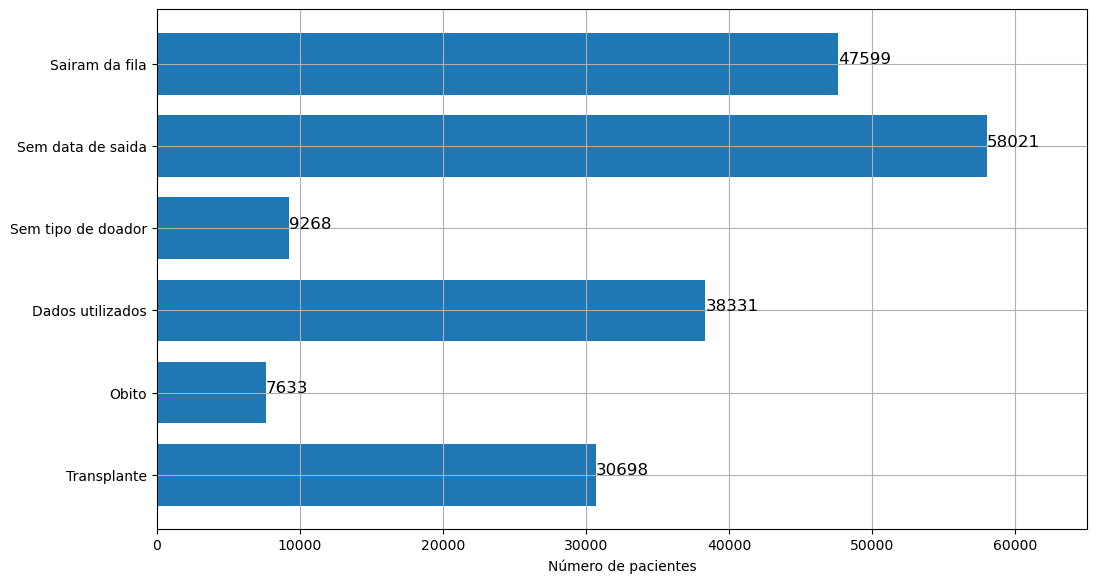

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.75

fig = plt.figure(figsize=[k * 16, k * 9])

# Example data
people = (
    "Sairam da fila",
    "Sem data de saida",
    "Sem tipo de doador",
    "Dados utilizados",
    "Obito",
    "Transplante"
)
y_pos = np.arange(len(people))
performance = [47599, (105620 - 47599), (47599-38331),38331,7633,30698]

ax = fig.add_subplot(1, 1, 1)

width = 0.75

ax.barh(
    y_pos,
    performance,
    width,
    align="center",
)

for i, v in enumerate(performance):
    ax.text(v, i, str(v), fontsize=12)

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Número de pacientes")
ax.set_xlim(0, 65000)
ax.grid()

plt.show()